In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column: {col}")
    print(unique_vals)
    print('---')


Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---
Column: gender
['Female' 'Male']
---
Column: SeniorCitizen
[0 1]
---
Column: Partner
['Yes' 'No']
---
Column: Dependents
['No' 'Yes']
---
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
---
Column: PhoneService
['No' 'Yes']
---
Column: MultipleLines
['No phone service' 'No' 'Yes']
---
Column: InternetService
['DSL' 'Fiber optic' 'No']
---
Column: OnlineSecurity
['No' 'Yes' 'No internet service']
---
Column: OnlineBackup
['Yes' 'No' 'No internet service']
---
Column: DeviceProtection
['No' 'Yes' 'No internet service']
---
Column: TechSupport
['No' 'Yes' 'No internet service']
---
Column: StreamingTV
['No' 'Yes' 'No internet service']
---
Column: StreamingMovies
['No' 'Yes' 'No internet service

In [5]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

In [6]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
y = df["Churn"]

In [9]:
X = df.drop("Churn",axis=1)

In [10]:
X = X.drop("customerID",axis=1)

In [11]:
X['Partner'] = X['Partner'].map({'Yes':1,'No':0})

In [12]:
X['Dependents'] = X['Dependents'].map({'Yes':1,'No':0})

In [13]:
X['PhoneService'] = X['PhoneService'].map({'Yes':1,'No':0})

In [14]:
X['MultipleLines'] = X['MultipleLines'].replace({
    'No phone service': 0,
    'No': 0,
    'Yes': 1
}).infer_objects(copy=False)

/var/folders/gc/z45ptddn10j4dnt9brrqf50c0000gn/T/ipykernel_68716/1798589145.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['MultipleLines'] = X['MultipleLines'].replace({


In [15]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,1,0,1,0,0,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,0,0,34,1,0,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,0,0,2,1,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,0,0,45,0,0,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,0,0,2,1,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [16]:
X['gender'] = X['gender'].map({'Male':0,'Female':1})

In [17]:
X['OnlineSecurity'] = X['OnlineSecurity'].map({'Yes':1,'No':0,'Nan':0,'No internet service':0})

In [18]:
X['OnlineBackup'] = X['OnlineBackup'].map({'Yes':1,'No':0,'No internet service':0})

In [19]:
X['DeviceProtection'] = X['DeviceProtection'].map({'Yes':1,'No':0,'No internet service':0})

In [20]:
X['TechSupport'] = X['TechSupport'].map({'Yes':1,'No':0,'No internet service':0})

In [21]:
X['StreamingMovies'] = X['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':0})

In [22]:
X['StreamingTV'] = X['StreamingTV'].map({'Yes':1,'No':0,'No internet service':0})

In [23]:
X['PaperlessBilling'] = X['PaperlessBilling'].map({'Yes':1,'No':0})

In [24]:
X.head(100)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,12,1,1,Fiber optic,1,0,0,0,0,0,Month-to-month,1,Electronic check,78.95,927.35
96,0,0,1,1,71,1,1,DSL,1,1,0,1,0,0,One year,1,Credit card (automatic),66.85,4748.7
97,0,0,0,0,5,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,21.05,113.85
98,0,0,0,0,52,1,0,No,0,0,0,0,0,0,Two year,0,Bank transfer (automatic),21.00,1107.2


In [25]:

X = pd.get_dummies(X, columns=['InternetService', 'PaymentMethod'])

contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
X['Contract'] = X['Contract'].map(contract_mapping)


In [26]:
X.head(100)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.5,True,False,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,True,False,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,12,1,1,1,0,0,...,1,78.95,927.35,False,True,False,False,False,True,False
96,0,0,1,1,71,1,1,1,1,0,...,1,66.85,4748.7,True,False,False,False,True,False,False
97,0,0,0,0,5,1,0,0,0,0,...,0,21.05,113.85,False,False,True,False,False,False,True
98,0,0,0,0,52,1,0,0,0,0,...,0,21.00,1107.2,False,False,True,True,False,False,False


In [27]:
print(X['InternetService_DSL'].unique())  

[ True False]


In [28]:

X = X.apply(lambda col: col.astype(int) if col.dtype == bool else col)


In [29]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.5,1,0,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,1,0,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,0,1,0,0,0,1,0


In [30]:
print((X == ' ').sum())



gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
Contract                                    0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
PaymentMethod_Bank transfer (automatic)     0
PaymentMethod_Credit card (automat

In [31]:

X['TotalCharges'].replace(' ', np.nan, inplace=True)


/var/folders/gc/z45ptddn10j4dnt9brrqf50c0000gn/T/ipykernel_68716/4156997915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['TotalCharges'].replace(' ', np.nan, inplace=True)


In [32]:
X['TotalCharges'] = X['TotalCharges'].astype(float)


In [33]:
X['TotalCharges'].fillna(X['TotalCharges'].mean(), inplace=True)


/var/folders/gc/z45ptddn10j4dnt9brrqf50c0000gn/T/ipykernel_68716/488417167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['TotalCharges'].fillna(X['TotalCharges'].mean(), inplace=True)


In [34]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)


In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()


In [36]:
log_reg.fit(Xtrain,ytrain)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred = log_reg.predict(Xtest)

In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,y_pred)

In [39]:
accuracy

0.8052243043725156

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

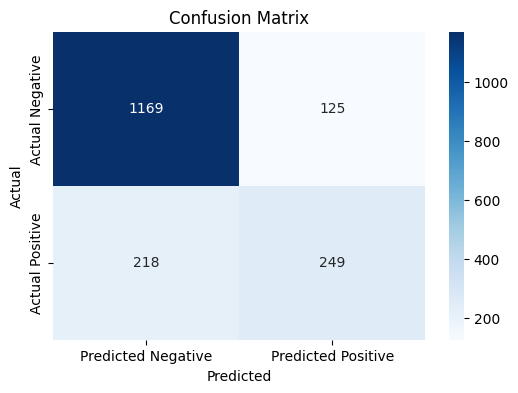

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.67      0.53      0.59       467

    accuracy                           0.81      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761



In [41]:
import seaborn as sns
cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(ytest, y_pred))
